Hamza Mhadi
Homework # 4 - Financial Planning 
APIs 
January 2021

In [1]:
#Initial Imports 

import os 
import requests 
import pandas as pd 
from dotenv import load_dotenv 
import alpaca_trade_api as tradeapi 
from MCForecastTools import MCSimulation 
import json

%matplotlib inline

In [2]:
# Load .env environment variables 
load_dotenv()

True

Part 1 - Personal Finance Planner 

Collect Crypto Prices Using the requests Library 

In [3]:
#Set current amount of crypto assets 

my_btc = 1.2
my_eth = 5.3

In [4]:
#Crypto API URLs 

btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
#Fetch current BTC Price & ETH Price 

btc_response_data = requests.get(btc_url)
btc_data = btc_response_data.json()
print(json.dumps(btc_data, indent =4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18601306,
            "total_supply": 18601306,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 35661.0,
                    "volume_24h": 61855939678,
                    "market_cap": 663337413065,
                    "percentage_change_1h": -1.18325552561631,
                    "percentage_change_24h": -9.7067502008873,
                    "percentage_change_7d": -9.82698552571653,
                    "percent_change_1h": -1.18325552561631,
                    "percent_change_24h": -9.7067502008873,
                    "percent_change_7d": -9.82698552571653
                },
                "CAD": {
                    "price": 45382.1886,
                    "volume_24h": 78717868834.2228,
                    "

In [6]:
eth_response_data = requests.get(eth_url)
eth_data = eth_response_data.json()
print(json.dumps(eth_data, indent=4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 114265327,
            "total_supply": 114265327,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 1148.34,
                    "volume_24h": 38491820914,
                    "market_cap": 129740389259,
                    "percentage_change_1h": -1.3737835355753,
                    "percentage_change_24h": -6.0710902228221,
                    "percentage_change_7d": -6.59910180925399,
                    "percent_change_1h": -1.3737835355753,
                    "percent_change_24h": -6.0710902228221,
                    "percent_change_7d": -6.59910180925399
                },
                "CAD": {
                    "price": 1461.377484,
                    "volume_24h": 48984691295.1564,
                   

In [7]:
#Store BTC and ETH Price 

btc_price = btc_data["data"]["1"]["quotes"]["CAD"]["price"]
eth_price = eth_data["data"]["1027"]["quotes"]["CAD"]["price"]

#Compute current value of my crypto 

my_btc_value = my_btc * btc_price 
my_eth_value = my_eth * eth_price

#Print current crypto wallet balance 
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $54458.63
The current value of your 5.3 ETH is $7745.30


Collect Investments Data Using Alpaca: SPY (stocks) and AGG (bonds) 


In [8]:
#Current amount of shares 

my_agg = 200 
my_spy = 50

In [9]:
#Set Alpaca API key and secret 

alpaca_api_key = os.getenv("alpaca_key_id")
alpaca_secret_key = os.getenv("alpaca_secret_key")

#Create the Alpaca API Object 

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2")

In [10]:
# Format current data as ISO format 

today = pd.Timestamp("2021-01-11", tz="America/New_York").isoformat()

#Set the tickers 

tickers = ["AGG", "SPY"]

#Set timeframe to '1D' for Alpaca API 

timeframe = '1D'

#Get current closing prices for SPY and AGG 

df_ticker = api.get_barset(
    tickers,
    timeframe, 
    start=today,
    end=today).df

#Preview DataFrame 
df_ticker.head()

AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2021-01-11 00:00:00-05:00  117.02  117.05  116.89  116.89  5047096  377.85   

                                                               
                             high       low   close    volume  
time                                                           
2021-01-11 00:00:00-05:00  380.58  377.7189  378.74  44814805

In [11]:
#pick AGG and SPY closing prices 

agg_price = float(df_ticker["AGG"]["close"])
spy_price = float(df_ticker["SPY"]["close"])

#Print AGG and SPY closing prices 

print(f"Current AGG closing price: ${agg_price}")
print(f"Current SPY closing price: ${spy_price}")

Current AGG closing price: $116.89
Current SPY closing price: $378.74


In [12]:
#Compute current value of shares 

my_agg_value = agg_price * my_agg
my_spy_value = spy_price * my_spy 

#Print current value of share 

print(f"The current value of your {my_spy} SPY shares is ${my_spy_value}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value}")

The current value of your 50 SPY shares is $18937.0
The current value of your 200 AGG shares is $23378.0


Savings Health Analysis 

In [13]:
#Set monthly household income 
monthly_income = 12000 

#Setting up values 
total_crypto_value = round(my_btc_value + my_eth_value,2)
total_shares_value = round(my_spy_value + my_agg_value,2)


data = { 
    "Amount" : [total_crypto_value , total_shares_value]}

tickers = ["Crypto", "Shares"]


#Create the savings DataFrame 
df_savings = pd.DataFrame(data, index=tickers)
df_savings.head()

,Amount
Crypto,62203.93
Shares,42315.00


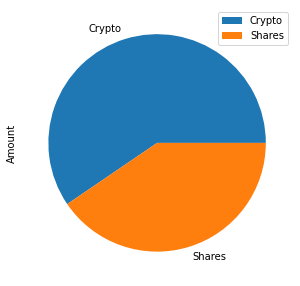

In [14]:
#Plot savings pie chart 

plot = df_savings.plot.pie(y="Amount", figsize=(5,5))

In [15]:
#Set ideal emergency fund 

emergency_fund = monthly_income * 3 

#Calaculae total amount of savings 
total_savings = total_crypto_value + total_shares_value 
gap = emergency_fund - total_savings

#Validae saving health 

if total_savings > emergency_fund: 
    print(f"Congrats, you have enough money in this fund")
elif total_savings == emergency_fund: 
    print(f"Congrats, you've reached your financial goal")
else: 
    print(f"You are {gap} dollars away from reaching the goal")

Congrats, you have enough money in this fund


Part 2 - Retirement Planning 

Monte Carlo Simulation 

In [19]:
# Set start and end dates of five years back from today 

start_date = pd.Timestamp('2016-01-13', tz="America/New_York").isoformat()
end_date = pd.Timestamp('2021-01-13', tz="America/New_York").isoformat()

In [18]:
#Get 5 years' worth of historical data for SPY and AGG 

#Reset the tickers 
tickers = ["AGG", "SPY"]

df_ticker2 = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date).df

#Display sample data
df_ticker2.head()

AGG                                         \
                             open      high       low   close     volume   
time                                                                       
2016-01-13 00:00:00-05:00  108.60  108.9300  108.5500  108.85  2752696.0   
2016-01-14 00:00:00-05:00  108.79  108.8900  108.5810  108.79  5000022.0   
2016-01-15 00:00:00-05:00  109.08  109.1200  108.8300  108.94  3049283.0   
2016-01-19 00:00:00-05:00  108.85  108.9600  108.7215  108.81  3956197.0   
2016-01-20 00:00:00-05:00  109.10  109.1825  108.8713  108.92  4008040.0   

                              SPY                                     
                             open    high     low   close     volume  
time                                                                  
2016-01-13 00:00:00-05:00  194.45  194.86  188.38  188.84  183463525  
2016-01-14 00:00:00-05:00  189.56  193.26  187.66  191.89  186907832  
2016-01-15 00:00:00-05:00  186.77  188.76  185.52  187.78  240958526  
2016-01-19 00:00:00-05:00  189.96  190.11  186.20  188.02  151482568  
2016-01-20 00:00:00-05:00  185.03  188.06  181.02  185.79  245668486

In [20]:
#Configuring a Monte Carlo simulation to forecast 30 years cumulative returns 

MC_even_dist = MCSimulation(
    portfolio_data = df_ticker2,
    weights = [0.4, 0.6],
    num_simulation = 500, 
    num_trading_days = 252*30 )

#Print the simulation input data 

MC_even_dist.portfolio_data.head()

AGG                                         \
                             open      high       low   close     volume   
time                                                                       
2016-01-13 00:00:00-05:00  108.60  108.9300  108.5500  108.85  2752696.0   
2016-01-14 00:00:00-05:00  108.79  108.8900  108.5810  108.79  5000022.0   
2016-01-15 00:00:00-05:00  109.08  109.1200  108.8300  108.94  3049283.0   
2016-01-19 00:00:00-05:00  108.85  108.9600  108.7215  108.81  3956197.0   
2016-01-20 00:00:00-05:00  109.10  109.1825  108.8713  108.92  4008040.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2016-01-13 00:00:00-05:00          NaN  194.45  194.86  188.38  188.84   
2016-01-14 00:00:00-05:00    -0.000551  189.56  193.26  187.66  191.89   
2016-01-15 00:00:00-05:00     0.001379  186.77  188.76  185.52  187.78   
2016-01-19 00:00:00-05:00    -0.001193  189.96  190.11  186.20  188.02   
2016-01-20 00:00:00-05:00     0.001011  185.03  188.06  181.02  185.79   

                                                   
                              volume daily_return  
time                                               
2016-01-13 00:00:00-05:00  183463525          NaN  
2016-01-14 00:00:00-05:00  186907832     0.016151  
2016-01-15 00:00:00-05:00  240958526    -0.021419  
2016-01-19 00:00:00-05:00  151482568     0.001278  
2016-01-20 00:00:00-05:00  245668486    -0.011860

In [21]:
#Running a Monte Carlo simulation to forecast 30 years cumulative returns 

MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.008521,0.998147,1.005205,0.997570,1.005381,0.997019,1.005775,1.007181,0.999703,1.000590,...,1.012370,1.003448,1.017626,0.980890,1.008772,1.005292,0.996103,1.012168,0.992438,0.991626
2,1.008111,0.999323,0.998889,1.007096,1.006364,1.015874,0.992782,1.014306,1.010040,1.011713,...,1.009616,1.006882,1.009085,0.982504,1.005750,0.996278,0.996736,1.007566,0.991597,0.999750
3,1.005430,0.997146,0.992664,0.997013,1.008105,1.012452,0.989006,1.015363,1.027881,1.024876,...,1.016714,0.999836,1.015773,0.991171,0.999758,0.992861,0.998427,0.997801,0.998529,1.004545
4,1.006005,1.005243,0.985383,0.987887,1.003952,1.014747,0.982382,1.017100,1.031734,1.024207,...,1.015607,0.997745,1.017664,0.985034,1.011217,0.990119,0.997995,1.014439,0.988063,1.006302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,3.317364,13.072177,13.602955,42.202350,22.080522,53.670041,7.920293,13.284770,8.313067,22.927281,...,37.129764,16.359844,64.967960,14.445476,54.287595,19.167639,41.256729,11.454095,11.134472,10.652980
7557,3.322470,13.108077,13.672373,42.304893,21.921414,53.328086,7.925208,13.311282,8.342291,23.004754,...,37.382954,16.317333,65.171835,14.359074,53.920279,19.150018,41.203176,11.406405,11.224359,10.623171
7558,3.281131,13.140462,13.547430,42.037157,21.802507,53.190556,8.063328,13.358539,8.441605,23.013057,...,37.012259,16.492243,65.871693,14.543792,54.122098,18.875412,41.027034,11.439683,11.160358,10.631911
7559,3.245180,13.320589,13.591780,41.949260,21.731481,52.695891,8.088936,13.296356,8.577974,22.965692,...,36.668763,16.456827,66.389852,14.536987,54.658068,18.942018,40.742033,11.532014,11.213254,10.644127


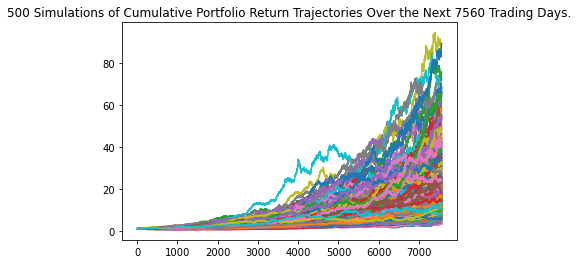

In [22]:
#Plot the simulation outcomes 

line_plot = MC_even_dist.plot_simulation()

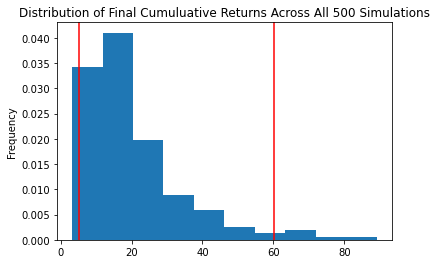

In [23]:
#Plot probability distribution and condidence intervales 

dist_plot = MC_even_dist.plot_distribution()

Retirement Analysis 

In [24]:
#Fetch summary statistics from the Monte Carlo simulation results 

even_tbl = MC_even_dist.summarize_cumulative_return()

#Print summary statistics 
print(even_tbl)

count           500.000000
mean             20.207336
std              13.780171
min               3.254879
25%              11.055203
50%              16.610817
75%              24.480391
max              89.069644
95% CI Lower      5.044046
95% CI Upper     60.260269
Name: 7560, dtype: float64


Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a $20,000 initial investment

In [28]:
#Set initial investment 

initial_investment = 20000

#Use the lower and upper 95% confidence intervals to calculate the range of the possible outcomes of our $20,000 

even_ci_lower = round(even_tbl[8]*initial_investment,2)
even_ci_upper = round(even_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $100880.91 and $1205205.38


Calculate the expected portfolio return at the 95% lower and uppr confidence intervals based on a 50% increase in the initial investment 

In [29]:
#Set the initial investment
initial_investment= 20000*1.5

#Use the lower and upper 95% confidence intervals to calculate the range of the possible outcomes of our $20,000 

even_ci_lower = round(even_tbl[8]*initial_investment,2)
even_ci_upper = round(even_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $151321.37 and $1807808.06
